In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
file_path = 'earthquake_data_fetched.csv'
earthquake_data = pd.read_csv(file_path)

In [11]:
earthquake_data.head()

,#EventID,Time,Latitude,Longitude,Depth/km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,10409611,2017-09-29T11:35:51,35.8170,-105.3304,5.000,us,NEIC PDE,us,us2000awh2,ML,3.2,us,NEW MEXICO
1,10409449,2017-09-28T04:56:33,35.9915,-96.8025,5.225,us,NEIC PDE,us,us2000avr9,ML,3.0,tul,OKLAHOMA
2,10407791,2017-09-24T01:11:37,36.3727,-97.1371,2.820,us,NEIC PDE,us,us2000atrn,Mwr,3.8,us,OKLAHOMA
3,10406457,2017-09-19T22:21:38,36.4583,-98.7977,6.167,us,NEIC PDE,us,us2000aray,ML,3.4,tul,OKLAHOMA
4,10406455,2017-09-19T22:17:53,36.4573,-98.7991,5.377,us,NEIC PDE,us,us2000arar,ML,3.1,tul,OKLAHOMA


In [12]:
earthquake_data_filtered = earthquake_data[earthquake_data['Magnitude'] >= 4]
earthquake_data_filtered['Year'] = pd.to_datetime(earthquake_data_filtered['Time']).dt.year
oklahoma_earthquakes = earthquake_data_filtered[earthquake_data_filtered['EventLocationName'] == 'OKLAHOMA']
earthquake_by_year = earthquake_data_filtered.groupby('Year').size().reset_index(name='Count')

C:\Users\Artem Frenk\AppData\Local\Temp\ipykernel_36540\3578527653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_data_filtered['Year'] = pd.to_datetime(earthquake_data_filtered['Time']).dt.year


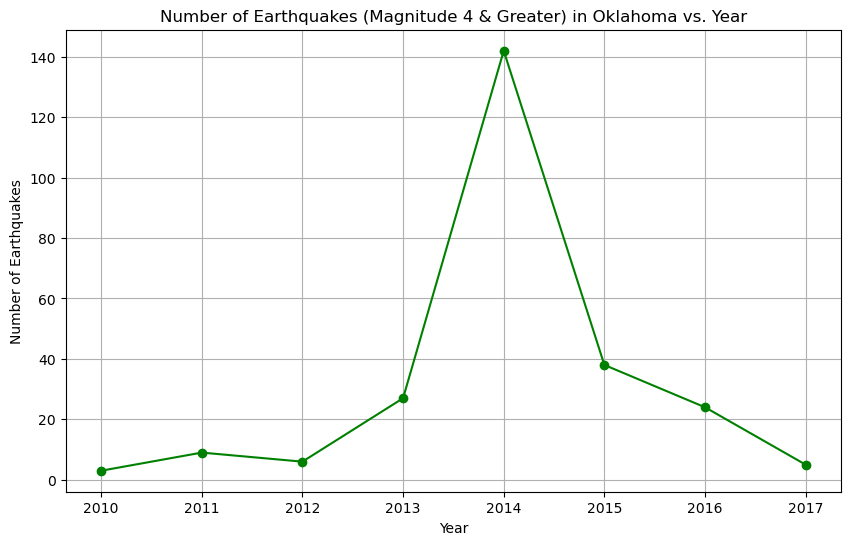

In [13]:
oklahoma_earthquakes_by_year = oklahoma_earthquakes.groupby('Year').size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
plt.plot(oklahoma_earthquakes_by_year['Year'], oklahoma_earthquakes_by_year['Count'], marker='o', color='green')
plt.title('Number of Earthquakes (Magnitude 4 & Greater) in Oklahoma vs. Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

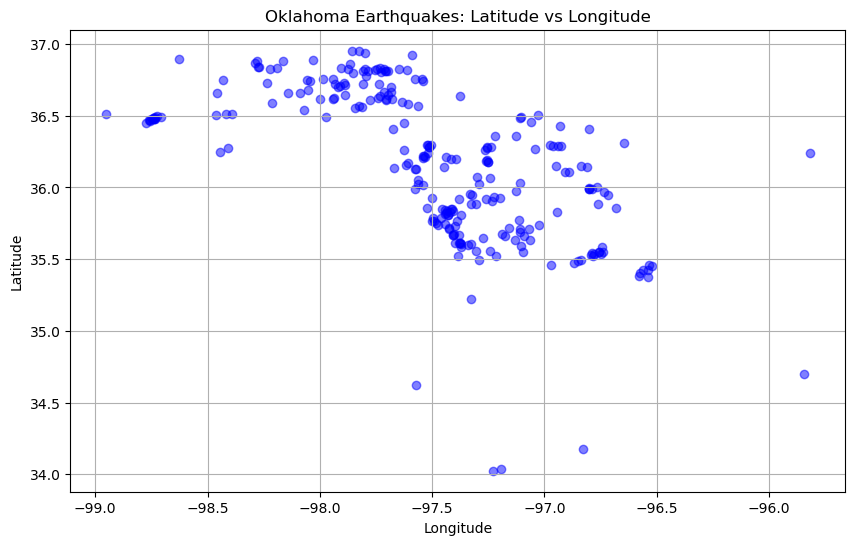

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(oklahoma_earthquakes['Longitude'], oklahoma_earthquakes['Latitude'], c='blue', alpha=0.5)
plt.title('Oklahoma Earthquakes: Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

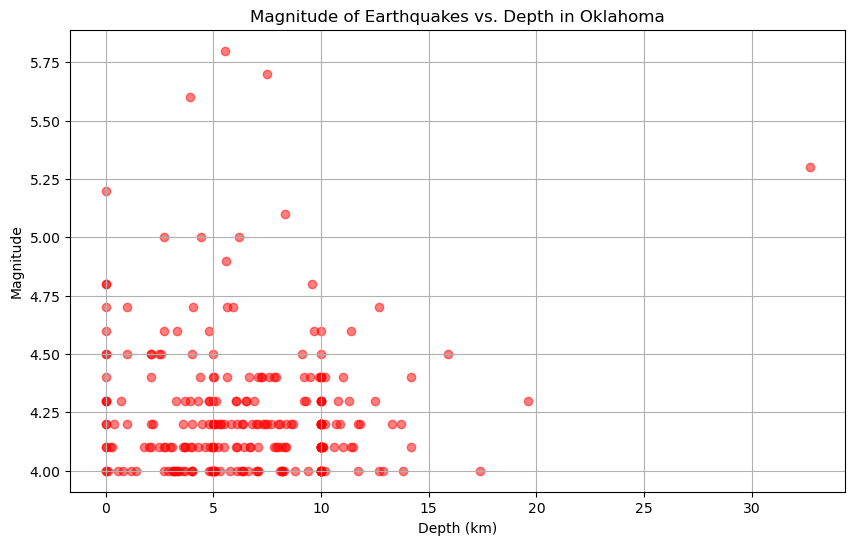

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(oklahoma_earthquakes['Depth/km'], oklahoma_earthquakes['Magnitude'], c='red', alpha=0.5)
plt.title('Magnitude of Earthquakes vs. Depth in Oklahoma')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()